In [1]:
from google.colab import files
uploaded = files.upload()

Saving nobel.csv to nobel.csv


In [3]:
# Loading in required libraries

import pandas as pd
import numpy as np

import geopandas as gpd # Geometry data for plotting data on the world map.
from mpl_toolkits.axes_grid1 import make_axes_locatable # To scale axis of the world map.

from matplotlib.ticker import PercentFormatter # Format axis in percentages

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch # draw line and make connected pateches.
import seaborn as sns

import missingno as msno #Visualizing missingness

In [22]:
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [7]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

As we can onserve, We've 911 entries, One row per each Nobel lautreates.<br> <font color="red"> ***We've alot of missingness in our dataset*** </font>, Specialy in <font color="blue"> motivation, birth_date, birth_country, birth_city, sex, organization_name, organization_city, organization_country, death_date, death_city, death_country </font>columns.
<br> Let's find out more about missingness, <font color="red"> **reasons and batterns.**</font>

# ***Data cleaning.***
Get the percentage of misssingness in our dataset and visualize it.

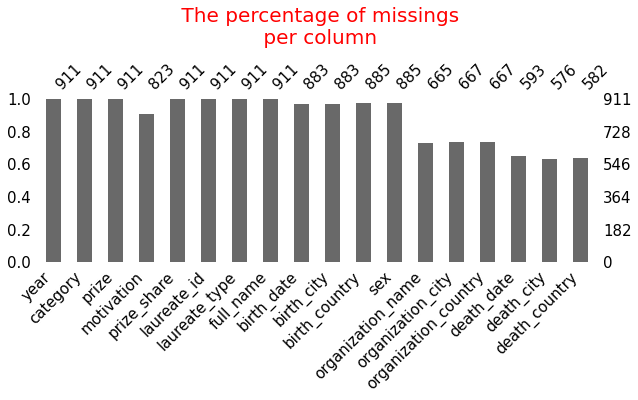

In [8]:
msno.bar(nobel, figsize=(10,3), fontsize=15)
plt.title(" The percentage of missings\n per column", y=1.3, fontsize=20, color="red")
plt.show()

Now, Let's get the correlation between missingness in our dataset.

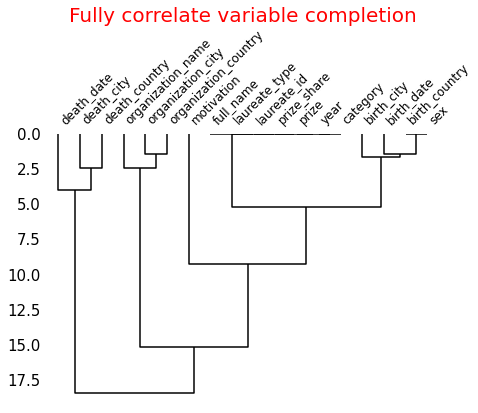

In [ ]:
msno.dendrogram(nobel, figsize=(7,5), fontsize=12)
plt.title("Fully correlate variable completion", fontsize=20, color="red")
plt.show()

To interpret this graph, read it from a top-to-down perspective.Cluster leaves which are linked together at a distance of zero.<br>
What looks clear from the dendrogram is that the missingness of our dataset are <font color="red"> **heighly correlated and can be mentioned as missing not at rondom:** </font>

1.   ***The death date, death city and death country*** columns </font> are highly correlated, as the Nobel laureates in these samples are still alive.
2.  **The organization name, organization city and organization country** columns. stand alone and their contributions did not belong to an organization.
2.   ***The birth_date, birth_city, birth_country and sex*** columns. It might be because Nobel laureates had Emigrated to anther country.
<br> <font color="red"> So, It makes sense for all these values and data to be missed</font>.

The missingness in motivations can be considered as Missing Completely at Random.

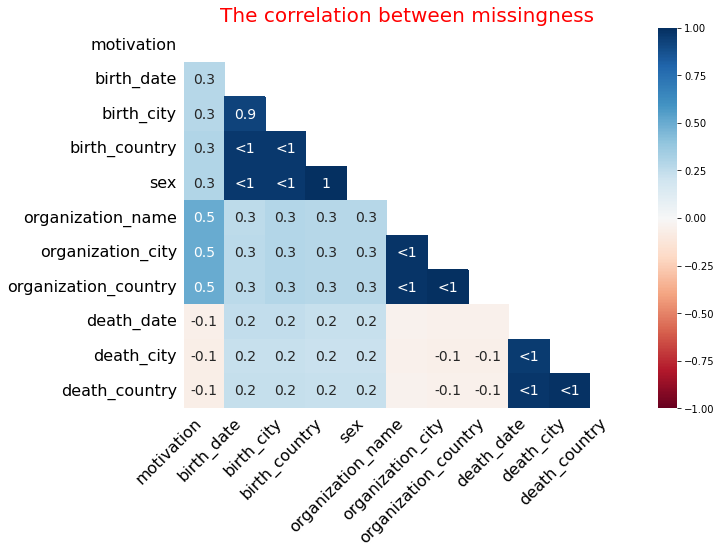

In [ ]:
msno.heatmap(nobel, figsize=(10,7))
plt.title("The correlation between missingness", fontsize=20, color="red")
plt.show()

Nullity correlation ranges from -1 to 1, where -1 means if one variable appears the other definitely does not, 0 means if variables appearing or not appearing have no effect on one another, 1 means if one variable appears the other definitely also does. As we can see there's a strong relation between missingnes in Skin_fold and serum_Insulin.

We've found out that missingness're very related to each in all columns, which ***we can mention that as missing not at random***, and our plan's to simply explore and analyze to extract some information.<font color="blue"> ***So, we're not going to deal with missingness.***</font> 

# ***Exploratory data analysis.***

Prize column contains the prize given to Nobel laureate,*** and It's very related to the category, Which in it's turn makes it does not add value or certian information***. But let's investigate to prove our idea.<br> Firstly let's remove the year using reguler expression.

In [9]:
nobel["prize"]= nobel.prize.str.replace("\d{4}", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [10]:
pd.DataFrame(nobel.groupby(by="category").prize.value_counts())

,,prize
category,prize,
Chemistry,The Nobel Prize in Chemistry,175
Economics,The Sveriges Riksbank Prize in Economic Sciences,78
Literature,The Nobel Prize in Literature,113
Medicine,The Nobel Prize in Physiology or Medicine,211
Peace,The Nobel Peace Prize,130
Physics,The Nobel Prize in Physics,204


<font color="blue"> ***As the Nobel laureate dataset was acquired from the Nobel Prize API. So, we can say that "category and year columns has been exteacted form prize column and now prize column dows not contain any useful information"***</font> , which makes sense.<br> So simple we're goining to drop ***the prize column*** for memory space reason. And we'll drope ***laureate_id ***column too, as it does not cotain useful information.

In [23]:
nobel.drop(["prize", "laureate_id"], axis=1, inplace=True)

### ***Who gets the Nobel Prize?***
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [12]:
male_female= pd.DataFrame(nobel.groupby(by=["sex"]).category.value_counts()).unstack()
male_female

category                                            
category Chemistry Economics Literature Medicine Peace Physics
sex                                                           
Female           4         1         14       12    16       2
Male           171        77         99      199    88     202

Let's convert this tabel into a nicer looking charts. But first let's set a global style for our graphs.

In [13]:
sns.set(font_scale=1.7, rc={"figure.figsize":(8,6)})
sns.set_style("ticks")

In [14]:
def display_percentage(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 4
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() / 1.2
            ax.annotate(percentage, (x, y), size = 12, weight="bold", color="black")
    sns.despine(top=True, right=True, left=True)

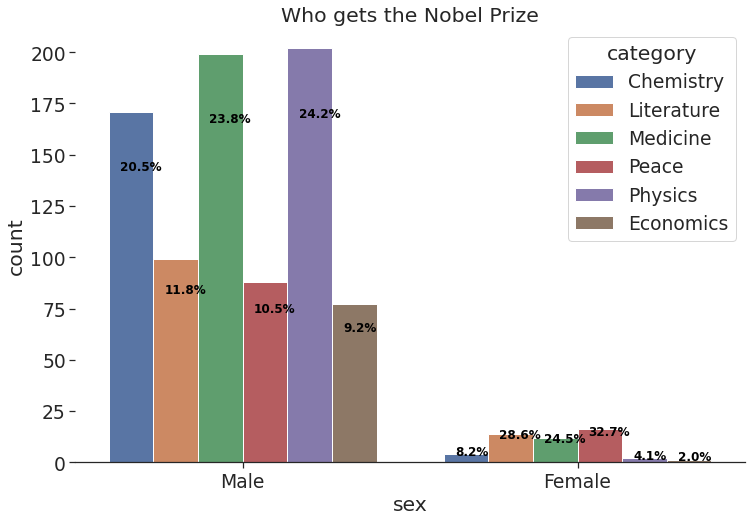

In [15]:
plt.figure(figsize=(12,8))
ax= sns.countplot(data=nobel, x="sex", hue="category")
display_percentage(ax, nobel["sex"], 2, 6)
plt.title("Who gets the Nobel Prize")
plt.show()

Focus on females.

In [16]:
gender= nobel.sex.value_counts()
category= nobel[nobel["sex"]== "Female"].category.value_counts()

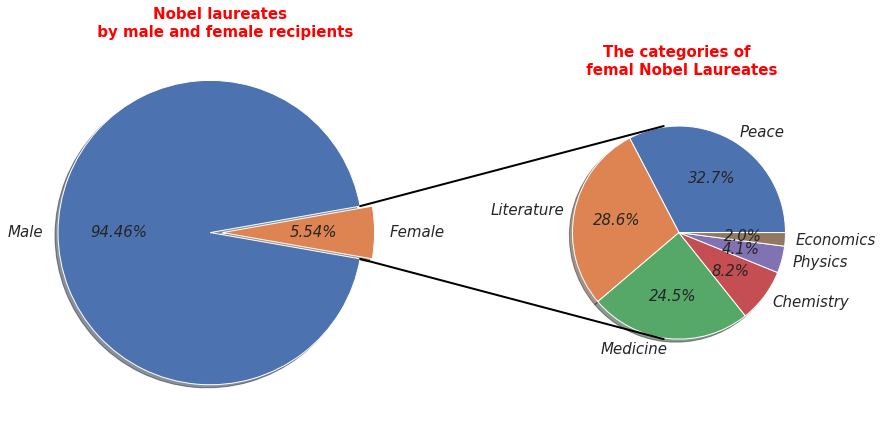

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.pie(gender, labels = gender.index, autopct='%1.2f%%', 
        explode = [0.08, 0],
        startangle=10,
        textprops={"fontsize":15, "style":"italic"}, 
        shadow=True) 

ax2.pie(category, labels= category.index, autopct='%1.1f%%', radius=0.7, 
        textprops={"fontsize":15, "style":"italic"}, shadow=True)

ax1.set_title("Nobel laureates \n by male and female recipients", color="red", size = 15, weight="bold")
ax2.set_title('The categories of \n femal Nobel Laureates', color="red", size = 15, weight="bold", y=0.9)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2, center, r = ax1.patches[0].theta1, ax1.patches[0].theta2, ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
width=0.2

con = ConnectionPatch(xyA=(- width / 2, .7), xyB=(x, y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.7), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

## ***What about birth country !***

In [19]:
nobel["birth_country"]=  nobel["birth_country"].astype("str")
nobel["birth_country"] = nobel["birth_country"].str.lower()

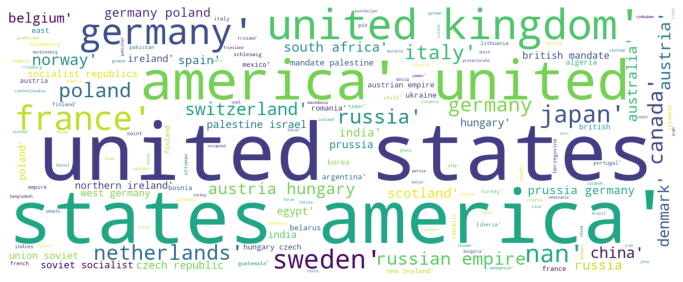

In [20]:
from wordcloud import WordCloud
 
plt.figure(figsize = (12, 8))

wordcloud = WordCloud(width = 1500, height = 600, background_color ='white')
 
birth_country= nobel["birth_country"].dropna().values
wordcloud.generate(str(birth_country))
# plot the WordCloud image                      

plt.imshow(wordcloud)
plt.axis("off")
 
plt.show()

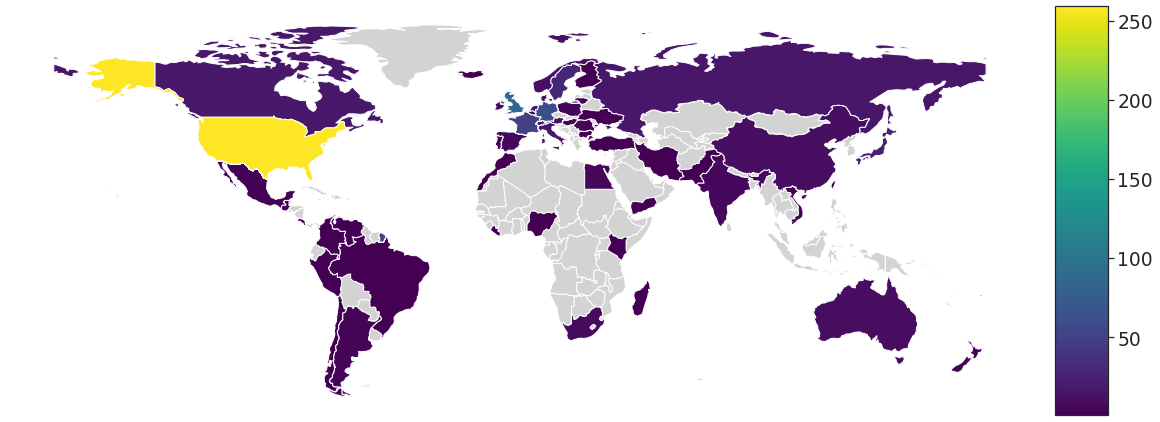

In [24]:
# Define geopandas geometry dataframe:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]  # Reflect countries with population, leaving Antartica out

# Define nobel prize dataframe:
newnobel = nobel.drop(['birth_date', 'death_date'], axis = 1)  # Geopandas conflict with Date format
newnobel['Nobel_Country_Count'] = nobel.groupby('birth_country')['birth_country'].transform('count')  # Derives count of Nobel prizes per Birth Country

# Merge geopandas geometry and nobel prize dataframes
df = pd.merge(nobel, world, how='left', left_on='birth_country', right_on='name').reset_index()
df_gdf = gpd.GeoDataFrame(df)

# Identify countries of birth for which 'geometry' was not merged
countries_not_reflected = df_gdf[df_gdf['geometry'].isna()]['birth_country'].unique()

# Plot world map!
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_axis_off()

# Format legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='lightgrey')
df_gdf.plot(ax=ax, column=newnobel['Nobel_Country_Count'],cmap='viridis', legend=True, cax=cax)
plt.show()

### ***USA dominance***.
Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [25]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot. So, let's convertv this table into a nocer looking chart.

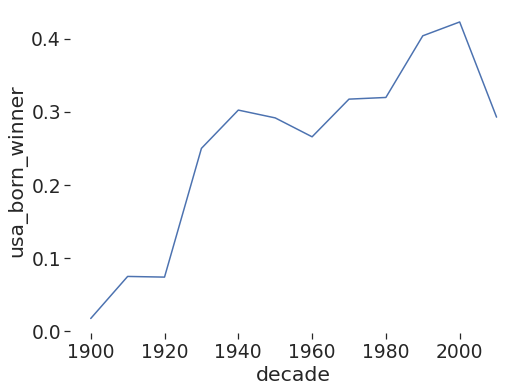

In [26]:
sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

### What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

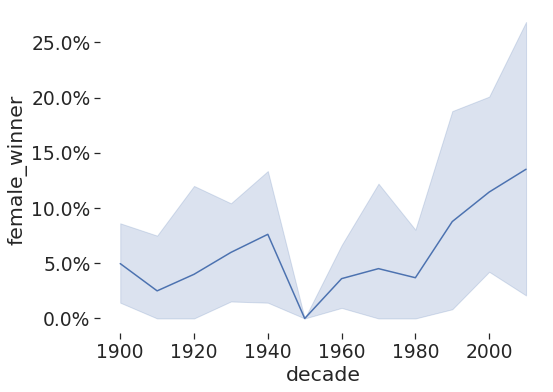

In [27]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', data=prop_female_winners)
sns.despine(top=True, right=True, bottom=True, left=True)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## ***The first woman to win the Nobel Prize***
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [ ]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == 'Female'].nsmallest(1, 'year')

,year,category,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


### How old are the nobel prize winner when he got the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

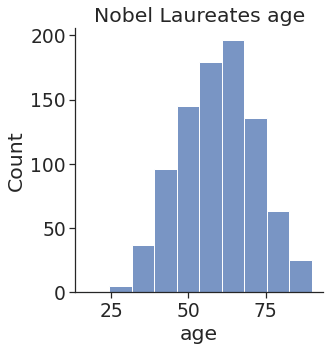

In [29]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year
sns.displot(data=nobel, x="age", bins=10)
plt.title("Nobel Laureates age")
plt.show()

The distribution tends to be left skewed, which means that we have more younger Nobel Laureates than old.

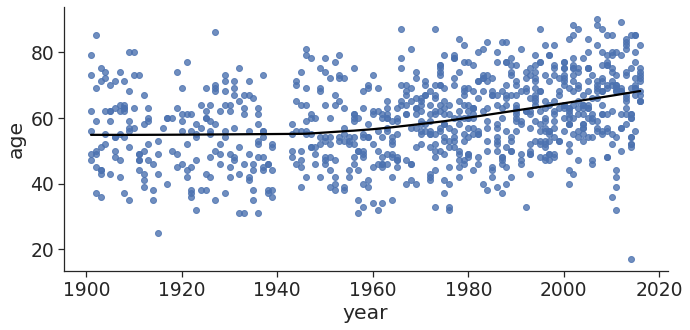

In [ ]:
# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, 
           aspect=2, line_kws={'color' : 'black'})

## Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

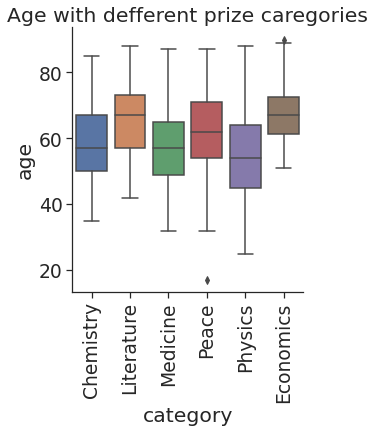

In [33]:
sns.catplot(data=nobel, x="category", y="age", kind="box")
plt.xticks(rotation=90)
plt.title("Age with defferent prize caregories")
plt.show()

The name of the youngest winner of a Nobel Prize as of 2016 is 'Malala Yousafzai'

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [ ]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,"""for having laid the foundations of mechanism ...",1/3,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


In [35]:
prize_share= pd.DataFrame((nobel.groupby("category").prize_share.value_counts()).unstack()).replace(np.nan, value=0)
prize_share

prize_share,1/1,1/2,1/3,1/4
category,,,,
Chemistry,63.0,53.0,45.0,14.0
Economics,24.0,36.0,18.0,0.0
Literature,105.0,8.0,0.0,0.0
Medicine,39.0,72.0,84.0,16.0
Peace,66.0,58.0,6.0,0.0
Physics,47.0,79.0,48.0,30.0


Convert this table into a nicer looking chart.

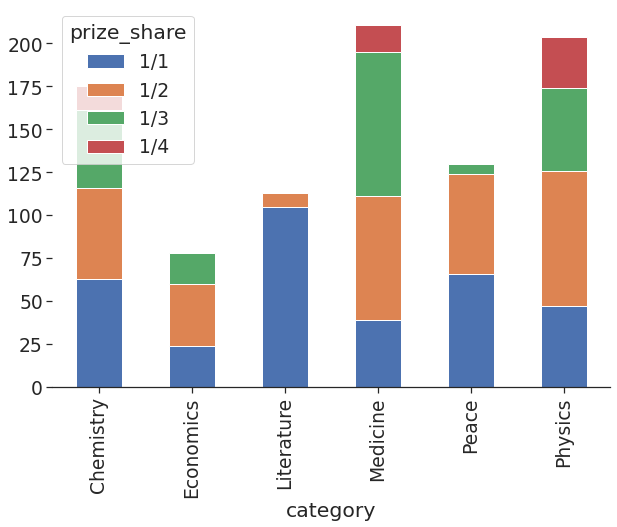

In [36]:
prize_share.plot(kind='bar', stacked=True, figsize=(10,7))
sns.despine(top=True, right=True, left=True)
plt.show()

Awesome that you reviewed the whole notebook! If you found this notebook interesting I really appreciate your support. If you have any suggestions for further improving this notebook please let me know via the comments!